## This python notebook extracts sea surface temperature data from the CESM2-LE for regions of interest around Florida and the Virgin Islands

In [1]:
import intake
import matplotlib.pyplot as plt
import xarray as xr
from distributed import Client
from ncar_jobqueue import NCARCluster
import dask
import numpy as np
from dask_jobqueue import PBSCluster
import esmlab

### Get some DASK going to speed up processing

In [2]:
# Setup your PBSCluster
cluster = PBSCluster(
    cores=2, # The number of cores you want
    memory='256 GB', # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus=2:mem=256GB', # Specify resources
    project='NCGD0011', # Input your project ID here
    walltime='03:00:00', # Amount of wall time
    interface='ib0', # Interface to use
)
# Scale up
cluster.scale(8)

# Change your url to the dask dashboard so you can see it
dask.config.set({'distributed.dashboard.link':'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'})

# Setup your client
client = Client(cluster)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40046 instead
  http_address["port"], self.http_server.port


In [3]:
client

Client Scheduler: tcp://10.12.206.64:32860 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/40046/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
catalog = intake.open_esm_datastore(
    '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
catalog.df.experiment.unique()

array(['historical', 'ssp370'], dtype=object)

In [6]:
#cat.search(component='ocn').df.variable.unique()
catalog.search(component='ocn',variable='TEMP').df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path,experiment,forcing_variant,cesm_member_id,control_branch_year,cmip_experiment_id
0,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1850-01,1859-12,185001-185912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
1,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1860-01,1869-12,186001-186912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
2,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1870-01,1879-12,187001-187912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
3,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1880-01,1889-12,188001-188912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
4,ocn,pop.h,b.e21.BHISTcmip6.f09_g17.LE2-1001.001,r1i1001p1f1,TEMP,1890-01,1899-12,189001-189912,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,historical,cmip6,1001.001,1001,CESM2_historical_r1i1001p1f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2055-01,2064-12,205501-206412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2596,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2065-01,2074-12,206501-207412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2597,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2075-01,2084-12,207501-208412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2
2598,ocn,pop.h,b.e21.BSSP370smbb.f09_g17.LE2-1301.020,r20i1301p1f2,TEMP,2085-01,2094-12,208501-209412,Potential Temperature,degC,1.0,month_1,/glade/campaign/cgd/cesm/CESM2-LE/timeseries/o...,ssp370,smbb,1301.020,1301,CESM2_ssp370_r20i1301p1f2


In [7]:
subset = catalog.search(component='ocn',variable='TEMP',experiment='ssp370',forcing_variant='cmip6')
#subset = catalog.search(component='ocn',variable='TEMP',experiment='historical',forcing_variant='cmip6')

In [8]:
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dsets = subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


In [9]:
dsets.keys()

dict_keys(['ocn.ssp370.pop.h.cmip6.TEMP'])

In [10]:
my_key = 'ocn.ssp370.pop.h.cmip6.TEMP'

In [11]:
coords = {'x':'TLONG','y':'TLAT'}
keepthese=['TEMP','z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
keep_vars = keepthese +list(coords.values())+['dz','KMT']

ds = dsets[my_key].drop([v for v in dsets[my_key].variables if v not in keep_vars])

### Select just the top level (top 10 m) of the ocean temperature data


In [12]:
ds = ds.isel(z_t=0)

In [13]:
#fix time dimension so it's a mean of the timebounds
ds["time"] = ds.time_bound.compute().mean(dim="d2")

In [14]:
ds

<xarray.Dataset>
Dimensions:      (d2: 2, member_id: 50, nlat: 384, nlon: 320, time: 1032, z_t_150m: 15)
Coordinates:
    z_t          float32 500.0
  * z_t_150m     (z_t_150m) float32 500.0 1.5e+03 2.5e+03 ... 1.35e+04 1.45e+04
    TLONG        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time         (time) object 2015-01-16 13:00:00.000001 ... 2100-12-16 12:0...
Dimensions without coordinates: d2, member_id, nlat, nlon
Data variables:
    dz           float32 dask.array<chunksize=(), meta=np.ndarray>
    KMT          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    time_bound   (time, d2) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    TEMP         (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 120, 384, 320), meta=np.ndarray>
Attributes:
    calendar:                All years have exactly  365 days.
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    intake_esm_varname:      ['TEMP']
    time_period_freq:        month_1
    history:                 none
    Conventions:             CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf...
    revision:                $Id$
    source:                  CCSM POP2, the CCSM Ocean Component
    contents:                Diagnostic and Prognostic Variables
    cell_methods:            cell_methods = time: mean ==> the variable value...
    intake_esm_dataset_key:  ocn.ssp370.pop.h.cmip6.TEMP

### get coordinate data for the CESM ocean grid

In [15]:
import pop_tools
import utils

ds_grid = pop_tools.get_grid('POP_gx1v7')

lons = ds_grid.TLONG
lats = ds_grid.TLAT
area = ds_grid.TAREA
lons_norm = utils.normal_lons(lons)

/glade/work/kristenk/miniconda/envs/analysis5/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


### These are areas we're interested in: lon and lat bounds

In [16]:
## monroe county coastal region (west coast of florida tip)
lonmin_monbox = -83.2
lonmax_monbox = -81.2
latmin_monbox = 25
latmax_monbox = 27

## Miami-dade county coastal region (east coast florida tip)
lonmin_dadebox = -80.8
lonmax_dadebox = -78.8
latmin_dadebox = 25
latmax_dadebox = 27

## US virgin islands region
lonmin_VIbox = -66
lonmax_VIbox = -63
latmin_VIbox = 17
latmax_VIbox = 20

### Make functions to subset Monroe county coastal region, Miami-Dade county coastal region, and US virgin islands

In [17]:
def subset_monroe(ds):
    # Subset TEMP for this location and make an area-weighted mean
    masked = ds.TEMP.where(lats<latmax_monbox).where(lats>latmin_monbox).where(lons_norm<lonmax_monbox).where(lons_norm>lonmin_monbox)
    da = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()

    return da

In [18]:
def subset_miami(ds):
    # Subset TEMP for this location and make an area-weighted mean
    masked = ds.TEMP.where(lats<latmax_dadebox).where(lats>latmin_dadebox).where(lons_norm<lonmax_dadebox).where(lons_norm>lonmin_dadebox)
    da = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()

    return da

In [19]:
def subset_vi(ds):
    # Subset TEMP for this location and make an area-weighted mean
    masked = ds.TEMP.where(lats<latmax_VIbox).where(lats>latmin_VIbox).where(lons_norm<lonmax_VIbox).where(lons_norm>lonmin_VIbox)
    da = esmlab.weighted_mean(masked, weights=area, dim=['nlat', 'nlon']).compute()

    return da

### Make the regional averages for each box (this step takes awhile: ~30 min total)

In [20]:
%%time

da_monroe = subset_monroe(ds)

CPU times: user 40.4 s, sys: 2.14 s, total: 42.6 s
Wall time: 13min 45s


In [21]:
%%time

da_miami = subset_miami(ds)

CPU times: user 56.9 s, sys: 2.41 s, total: 59.3 s
Wall time: 13min 31s


In [22]:
%%time

da_vi = subset_vi(ds)

CPU times: user 58.2 s, sys: 2.43 s, total: 1min
Wall time: 13min 56s


### Make a few plots of the data

CPU times: user 244 ms, sys: 5 ms, total: 249 ms
Wall time: 546 ms


[Text(0, 0.5, 'Sea temperature (top 10m)'), Text(0.5, 0, 'Year')]

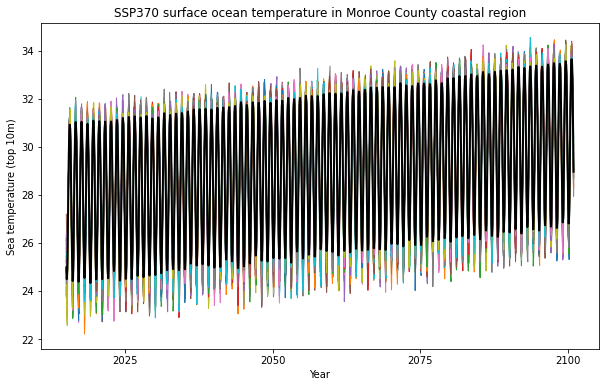

In [23]:
%%time

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('SSP370 surface ocean temperature in Monroe County coastal region')

da_ensmean = da_monroe.mean(dim='member_id')

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(da_monroe.time, da_monroe.isel(member_id=mem),linewidth=1)
ax.plot(da_monroe.time, da_ensmean,linewidth=2, color='black')
ax.set(ylabel='Sea temperature (top 10m)',xlabel='Year');

CPU times: user 222 ms, sys: 1.87 ms, total: 224 ms
Wall time: 230 ms


[Text(0, 0.5, 'Sea temperature (top 10m)'), Text(0.5, 0, 'Year')]

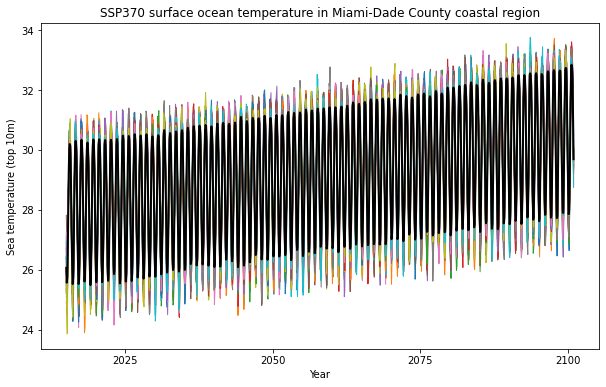

In [24]:
%%time

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('SSP370 surface ocean temperature in Miami-Dade County coastal region')

da_ensmean = da_miami.mean(dim='member_id')

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(da_miami.time, da_miami.isel(member_id=mem),linewidth=1)
ax.plot(da_miami.time, da_ensmean,linewidth=2, color='black')
ax.set(ylabel='Sea temperature (top 10m)',xlabel='Year');

CPU times: user 226 ms, sys: 784 µs, total: 226 ms
Wall time: 236 ms


[Text(0, 0.5, 'Sea temperature (top 10m)'), Text(0.5, 0, 'Year')]

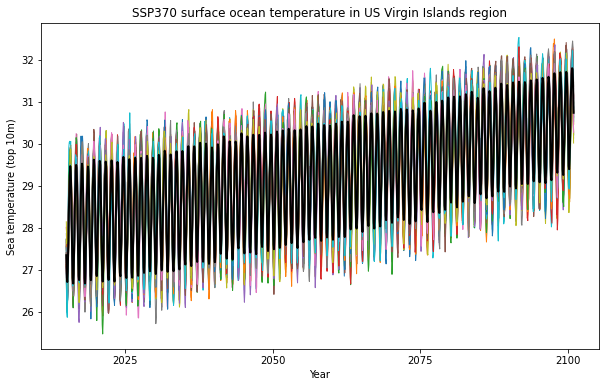

In [25]:
%%time

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('SSP370 surface ocean temperature in US Virgin Islands region')

da_ensmean = da_vi.mean(dim='member_id')

for mem in np.arange(0,50,1):
    #print(mem)
    ax.plot(da_vi.time, da_vi.isel(member_id=mem),linewidth=1)
ax.plot(da_vi.time, da_ensmean,linewidth=2, color='black')
ax.set(ylabel='Sea temperature (top 10m)',xlabel='Year');

### Prepare netcdf to write out

In [26]:
ds_out = xr.Dataset()
ds_out['Monroe_county_coast_SST'] = da_monroe
ds_out['MiamiDade_county_coast_SST'] = da_miami
ds_out['VirginIslands_region_SST'] = da_vi

ds_out = ds_out.drop(['z_t'])

In [27]:
file_out = '/glade/work/kristenk/Dunning_innovator_files/regional_SST_avgs_futureSSP370.nc'
ds_out.to_netcdf(file_out)